<a href="https://colab.research.google.com/github/scratchelite/ML-Lab-441b/blob/main/HW_Week9_Unsupervised_clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [2]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [6]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab/Country-data.csv", sep = ",")

In [7]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [9]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)



In [10]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [11]:
kmeans = KMeans(n_clusters= 5
                , random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [12]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

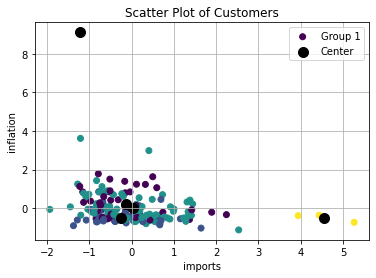

In [13]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
x1_index = 3
x2_index = 5


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

In [14]:
WCSs = []
Ks = range(1,15)
for k in Ks:
  kmeans = KMeans(n_clusters= k , n_init=30)
  kmeans.fit(X_scaled)
  WCSs.append(kmeans.inertia_)


# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

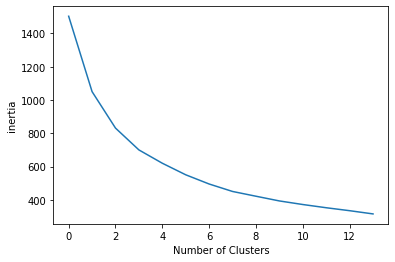

In [15]:
plt.plot(WCSs)
plt.xlabel("Number of Clusters")
plt.ylabel("inertia")
plt.show()

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

In [16]:
kmeans = KMeans(n_clusters = k).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [19]:
preds = pd.DataFrame(kmeans.predict(X_scaled))
output = pd.concat([preds,names],axis=1)
print("Cluster 1:")
list(output[output[0] == 1]["country"])

Cluster 1:


['Antigua and Barbuda',
 'Bahrain',
 'Belarus',
 'Bulgaria',
 'Cyprus',
 'Czech Republic',
 'Estonia',
 'Hungary',
 'Latvia',
 'Lithuania',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Panama',
 'Seychelles',
 'Slovak Republic',
 'Slovenia',
 'South Korea',
 'Thailand',
 'Tunisia',
 'Vietnam']

#6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [20]:
Q6df = pd.concat([preds,X], axis = 1)

In [21]:
Q6df.groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,63.769231,18.452231,4.053077,32.189685,3278.461538,8.712308,65.284615,3.676923,1031.461538
1,9.842857,65.104762,6.413810,65.866667,20680.476190,3.029810,75.714286,1.748571,12526.190476
2,58.300000,21.983333,8.078333,28.483333,5958.333333,15.876667,65.166667,4.573333,3122.166667
3,4.185714,65.271429,10.738571,56.857143,48185.714286,1.409714,80.614286,1.782857,58671.428571
4,14.145833,31.079167,7.818750,39.566667,13610.000000,4.644458,75.858333,1.844167,8428.333333
5,55.687500,34.400000,10.466250,78.275000,4450.000000,5.666250,60.062500,3.451250,2538.375000
6,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000
7,10.120000,67.960000,2.742000,37.400000,76740.000000,12.596000,77.480000,2.178000,39680.000000
8,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


# Q7.) Write an observation about the descriptive statistics.

In [ ]:
#The relationship between health and income varies by cluster rather than being a straightforward trend.